### Environment Setup and Data Load

In [ ]:
## Load the libraries

In [70]:
warning=FALSE
options(warn = -1)
install.packages("corrplot")

library(dplyr)
library(tidyr)
library(ggplot2)
library(readr)
library(stringr)
#library(car)
library(corrplot)



In [ ]:
## load data from directory

In [133]:
data <-read.csv("MovieData.csv", header=TRUE, sep= ",")
# there will be a summary of the column format when the file is read, which is okay

In [134]:
## Review sample of first few and last few rows
head(data,3)
tail(data,3)

id_number,Title.flag,movie_name,year,budget,domestic,international,rating,storytype,source,...,Actor.2.FB.Like,Actor.3.Name,Actor.3.FB.Like,Total.Cast.FB.Like,Movie.FB.Like,IMDB.Score,directors_avg_bo,actor_1_avg_bo,actor_2_avg_bo,actor_3_avg_bo
284970100,0,12 Strong,2017,35000000,20088384,2500000,R,Historical Fiction,Fiction Book/Short Story,...,NA,,NA,NA,NA,NA,NA,NA,NA,NA
278830100,0,A Bad Moms Christmas,2017,28000000,72110659,55600000,R,Contemporary Fiction,Original Screenplay,...,NA,,NA,NA,NA,NA,NA,NA,NA,NA
229540100,0,American Made,2017,50000000,51342000,84239390,R,Dramatization,Factual Book/Real Events,...,NA,,NA,NA,NA,NA,NA,NA,NA,NA


,id_number,Title.flag,movie_name,year,budget,domestic,international,rating,storytype,source,...,Actor.2.FB.Like,Actor.3.Name,Actor.3.FB.Like,Total.Cast.FB.Like,Movie.FB.Like,IMDB.Score,directors_avg_bo,actor_1_avg_bo,actor_2_avg_bo,actor_3_avg_bo
1692,620100,0,X-Men: The Last Stand,2006,210000000,234362462,224898484,PG-13,Super Hero,Graphic Novel/Game,...,808,Daniel Cudmore,560,21714,0,6.8,277414597,246643677,547842547,459260946
1693,6310100,0,"You, Me and Dupree",2006,54000000,75802010,54600000,PG-13,Contemporary Fiction,Original Screenplay,...,245,Amanda Detmer,240,847,0,5.6,666036131,130402010,130402010,130402010
1694,34430100,0,Zoom,2006,35000000,11989328,516860,PG,Super Hero,Graphic Novel/Game,...,826,Thomas F. Wilson,690,5022,494,4.2,12506188,29823225,120321079,23319152


In [135]:
#return data column with index ID to determine which ones to keep and which ones to remove

as.data.frame(colnames(data))%>%
    mutate(col_index=c(1:29))

colnames(data),col_index
id_number,1
Title.flag,2
movie_name,3
year,4
budget,5
domestic,6
international,7
rating,8
storytype,9
source,10


### Data Cleaning

In [136]:
#convert box office sales to int type

data$domestic <- as.numeric(data$domestic)
data$international <- as.numeric(data$international)
data$directors_avg_bo <- as.numeric(data$directors_avg_bo)
data$actor_1_avg_bo <- as.numeric(data$actor_1_avg_bo)
data$actor_2_avg_bo <- as.numeric(data$actor_2_avg_bo)
data$actor_3_avg_bo <- as.numeric(data$actor_3_avg_bo)

In [86]:
#removing columns not needed for analysis (name, faceook likes, IMDB score etc) using the previous results as a guide for the index
data<-data[,-c(14:25)]

In [87]:
# retrieve the column headers of the cleaned data
names(data)

[1] "id_number"         "Title flag"        "movie_name"       
 [4] "year"              "budget"            "domestic"         
 [7] "international"     "rating"            "storytype"        
[10] "source"            "production_method" "genre"            
[13] "sequel"            "directors_avg_bo"  "actor_1_avg_bo"   
[16] "actor_2_avg_bo"    "actor_3_avg_bo"

In [88]:
# review data structure and explore preliminary data 
dim(data)
summary(data)

[1] 1694   17

   id_number           Title flag        movie_name             year     
 Min.   :    20100   Min.   : 0.00000   Length:1694        Min.   :2006  
 1st Qu.: 40137600   1st Qu.: 0.00000   Class :character   1st Qu.:2008  
 Median :139780100   Median : 0.00000   Mode  :character   Median :2010  
 Mean   :122416245   Mean   : 0.02715                      Mean   :2011  
 3rd Qu.:185157600   3rd Qu.: 0.00000                      3rd Qu.:2014  
 Max.   :298120100   Max.   :11.00000                      Max.   :2017  
                                                                         
     budget             domestic         international          rating         
 Min.   : 10000000   Min.   :     3200   Min.   :3.471e+03   Length:1694       
 1st Qu.: 20000000   1st Qu.: 14800725   1st Qu.:1.058e+07   Class :character  
 Median : 35000000   Median : 38583626   Median :3.904e+07   Mode  :character  
 Mean   : 54642544   Mean   : 67258922   Mean   :9.900e+07                     
 3rd Qu.

In [89]:
# Removal of rows with missing values and domestic only movies
data2<-na.omit(data)
data3<-data2 %>% filter(!domestic==0) %>% filter(!international==0)
dim(data2) 
dim(data3)

[1] 1254   17

[1] 1254   17

In [90]:
# Consolidating categorical variables & modification of the variable types

data3$source<-as.character(data3$source)
data3$genre[data3$genre=="Black Comedy"] <- "Comedy"
data3$genre[data3$genre=="Western"] <- "Adventure"
data3$genre[data3$genre=="Romantic Comedy"] <- "Comedy"
data3$genre[data3$genre=="Horror"] <- "Thriller/Horror"
data3$genre[data3$genre=="Thriller/Suspense"]<-"Thriller/Horror"
data3$source[data3$source=="Religious Text"]<-"Fiction Book/Short Story"
data3$rating[data3$rating=="G"]<-"PG"

drama<-c("230150100","167200100","116330100","3960100","72450100","22040100","33420100","188570100","144240100","107400100","114270100","226650100","143780100")
comedy<-c("189420100","149620100","193530100","2020100","144870100","3130100","4880100")

data3$genre[data3$id_number %in% drama] <- "Drama"
data3$genre[data3$id_number %in% comedy] <- "Comedy"

In [91]:
# assign facotr type to categorical for modeling later

data3$rating<-as.factor(data3$rating)
data3$storytype<-as.factor(data3$storytype)
data3$source<-as.factor(data3$source)
data3$production_method<-as.factor(data3$production_method)
data3$genre<-as.factor(data3$genre)
data3$sequel<-as.factor(data3$sequel)
glimpse(data3)

#check converted columns
summary(data3)

Observations: 1,254
Variables: 17
$ id_number         <dbl> 264790100, 200450100, 230490100, 207170100, 20282...
$ `Title flag`      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ movie_name        <chr> "Flatliners", "Alice Through the Looking Glass", ...
$ year              <dbl> 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2...
$ budget            <dbl> 2.00e+07, 1.70e+08, 2.00e+07, 9.50e+07, 2.50e+08,...
$ domestic          <dbl> 16877430, 77042381, 113257297, 26410477, 40808434...
$ international     <dbl> 28192226, 200400000, 68200000, 62314623, 74522014...
$ rating            <fct> PG-13, PG, R, PG-13, PG-13, PG-13, R, PG-13, PG-1...
$ storytype         <fct> Science Fiction, Fantasy, Contemporary Fiction, H...
$ source            <fct> Original Screenplay, Fiction Book/Short Story, Or...
$ production_method <fct> Live Action, Animation/Live Action, Live Action, ...
$ genre             <fct> Thriller/Horror, Adventure, Comedy, Drama, Action...
$ sequel          

   id_number           Title flag        movie_name             year     
 Min.   :    20100   Min.   :0.000000   Length:1254        Min.   :2006  
 1st Qu.: 29477600   1st Qu.:0.000000   Class :character   1st Qu.:2008  
 Median :130165100   Median :0.000000   Mode  :character   Median :2010  
 Mean   :111122548   Mean   :0.002392                      Mean   :2010  
 3rd Qu.:169275100   3rd Qu.:0.000000                      3rd Qu.:2013  
 Max.   :264790100   Max.   :1.000000                      Max.   :2017  
                                                                         
     budget             domestic         international         rating   
 Min.   : 10000000   Min.   :     3200   Min.   :5.778e+03   PG   :224  
 1st Qu.: 20000000   1st Qu.: 17191765   1st Qu.:1.131e+07   PG-13:541  
 Median : 35000000   Median : 40240816   Median :3.904e+07   R    :489  
 Mean   : 56092783   Mean   : 67740201   Mean   :9.641e+07              
 3rd Qu.: 70000000   3rd Qu.: 84902502   3r

### Data Exploration via Descriptive Charts

In [92]:
# Exploratory data analysis and data transformation, creating the 6 by 6 frame

multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

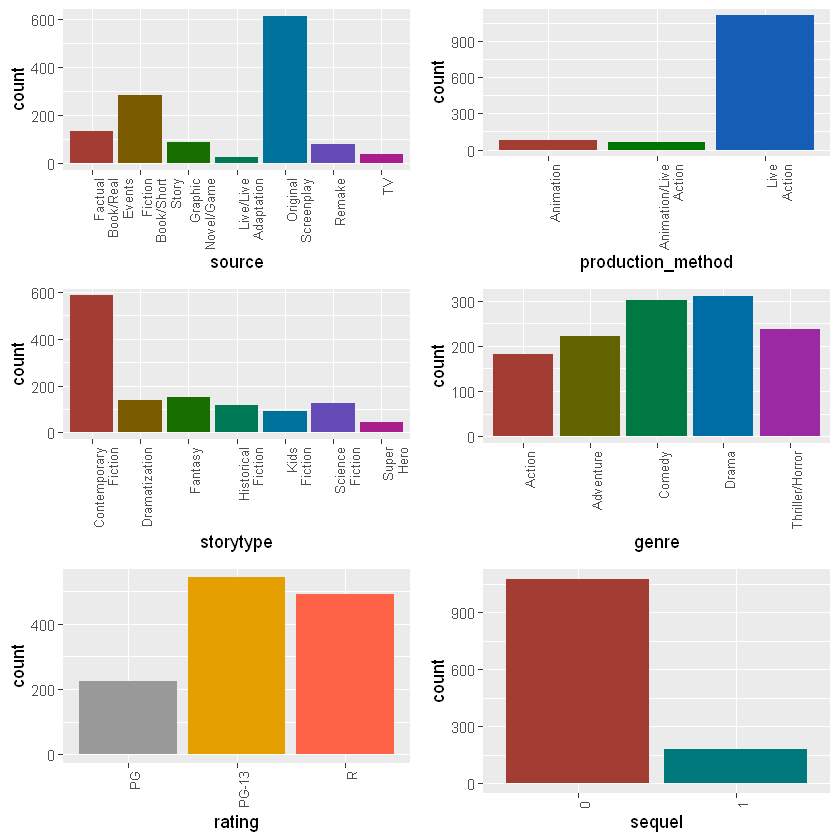

In [93]:
#plotting discriptive bar charts for data set where movies must have both domestic and international box office values
#edit x axis ticks to make it shorter
data3$source <- gsub(" ", "\n",data3$source)
data3$storytype <- gsub(" ", "\n",data3$storytype)
data3$production_method <- gsub(" ", "\n",data3$production_method)

#define x axis tick format
x_axis_label<-theme(legend.position="none", axis.text.x=element_text(angle=90,hjust=1, size = 8))


hist_source <-ggplot(data3,aes(x=source,fill = source))+
geom_bar() + 
x_axis_label+
scale_fill_hue(l=40, c=80)

hist_storytype<-ggplot(data3,aes(x=storytype,fill = storytype))+
geom_bar()+
x_axis_label+
scale_fill_hue(l=40, c=80)

hist_rating<-ggplot(data3,aes(x=rating, fill = rating))+
geom_bar()+
x_axis_label+
scale_fill_manual(values=c("#999999", "#E69F00", "#FF6347"))

hist_production_method<-ggplot(data3,aes(x=production_method, fill = production_method))+
geom_bar()+
x_axis_label+
scale_fill_hue(l=40, c=80)

hist_genre<-ggplot(data3,aes(x=genre, fill = genre))+
geom_bar()+
x_axis_label+
scale_fill_hue(l=40, c=80)

hist_sequel<-ggplot(data3,aes(x=sequel, fill = sequel))+
geom_bar()+
x_axis_label+
scale_fill_hue(l=40, c=80)

multiplot(hist_source, hist_storytype, hist_rating, hist_production_method, hist_genre,hist_sequel,cols=2)


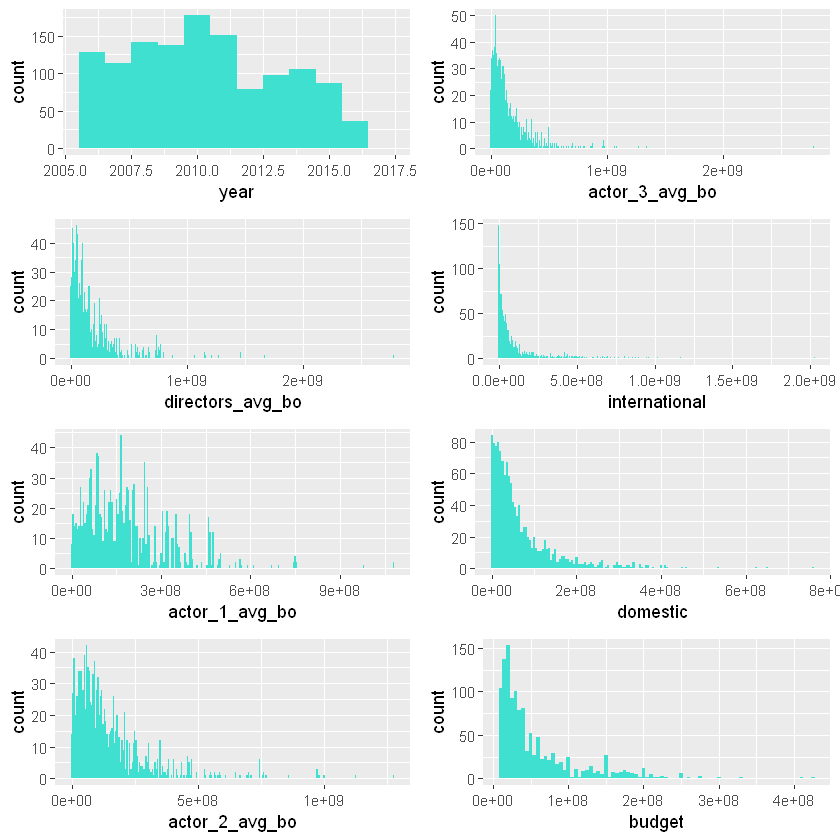

In [94]:
# more discriptive plot graphs

hist_year<-ggplot(data3,aes(x=year))+geom_histogram(fill = "#40E0D0",binwidth = 1)
hist_directors<-ggplot(data3,aes(x=directors_avg_bo))+geom_histogram(fill = "#40E0D0",binwidth = 5000000)
hist_actor_1<-ggplot(data3,aes(x=actor_1_avg_bo))+geom_histogram(fill = "#40E0D0",binwidth = 5000000)
hist_actor_2<-ggplot(data2,aes(x=actor_2_avg_bo))+geom_histogram(fill = "#40E0D0",binwidth = 5000000)
hist_actor_3<-ggplot(data2,aes(x=actor_3_avg_bo))+geom_histogram(fill = "#40E0D0",binwidth = 5000000)
hist_international<-ggplot(data3,aes(x=international))+geom_histogram(fill = "#40E0D0",binwidth = 5000000)
hist_domestic<-ggplot(data3,aes(x=domestic))+geom_histogram(fill = "#40E0D0",binwidth = 5000000)
hist_budget<-ggplot(data3,aes(x=budget))+geom_histogram(fill = "#40E0D0",binwidth = 5000000)

multiplot(hist_year, hist_directors, hist_actor_1, hist_actor_2, hist_actor_3,hist_international,hist_domestic,hist_budget,cols=2)

#All of the Box Office data distribution are skewed, and therefore is not fit for analysis in its raw state
#Next we will convert it to it's log 

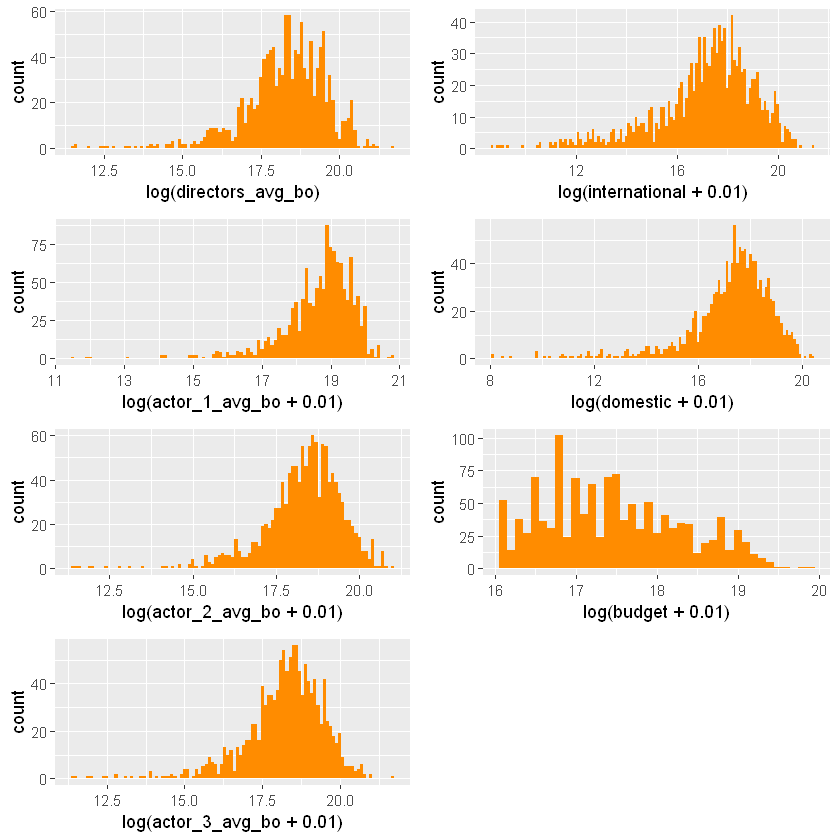

In [95]:
# convert using log
hist_ln_directors<-ggplot(data3,aes(x=log(directors_avg_bo)))+geom_histogram(fill = "#FF8C00", binwidth = .1)
hist_ln_actor_1<-ggplot(data3,aes(x=log(actor_1_avg_bo+0.01)))+geom_histogram(fill = "#FF8C00",binwidth = .1)
hist_ln_actor_2<-ggplot(data2,aes(x=log(actor_2_avg_bo+0.01)))+geom_histogram(fill = "#FF8C00",binwidth = .1)
hist_ln_actor_3<-ggplot(data2,aes(x=log(actor_3_avg_bo+0.01)))+geom_histogram(fill = "#FF8C00",binwidth = .1)
hist_ln_international<-ggplot(data3,aes(x=log(international+0.01)))+geom_histogram(fill = "#FF8C00",binwidth = .1)
hist_ln_domestic<-ggplot(data3,aes(x=log(domestic+0.01)))+geom_histogram(fill = "#FF8C00",binwidth = .1)
hist_ln_budget<-ggplot(data3,aes(x=log(budget+0.01)))+geom_histogram(fill = "#FF8C00",binwidth = .1)

multiplot(hist_ln_directors, hist_ln_actor_1, hist_ln_actor_2, hist_ln_actor_3,hist_ln_international,hist_ln_domestic,hist_ln_budget,cols=2)

# Distribution looks more normal now and is ready for analysis

In [109]:
# creat genre and source correlations
data3$ln_budget<-log(data3$budget)
data3$sqrt_budget<-sqrt(data3$budget)
data3$ln_international<-log(data3$international+1)
data3$ln_domestic<-log(data3$domestic)
data3$ln_directors_avg_bo<-log(data3$directors_avg_bo)
data3$ln_actor_1_avg_bo<-log(data3$actor_1_avg_bo)
data3$ln_actor_2_avg_bo<-log(data3$actor_2_avg_bo)
data3$ln_actor_3_avg_bo<-log(data3$actor_3_avg_bo)
data3$ln_sum_actor_avg_bo<-log(data3$actor_1_avg_bo+data3$actor_2_avg_bo+data3$actor_3_avg_bo)

#disply columns in order of index
as.data.frame(colnames(data3))%>%
    mutate(col_index=c(1:26))


colnames(data3),col_index
id_number,1
Title flag,2
movie_name,3
year,4
budget,5
domestic,6
international,7
rating,8
storytype,9
source,10


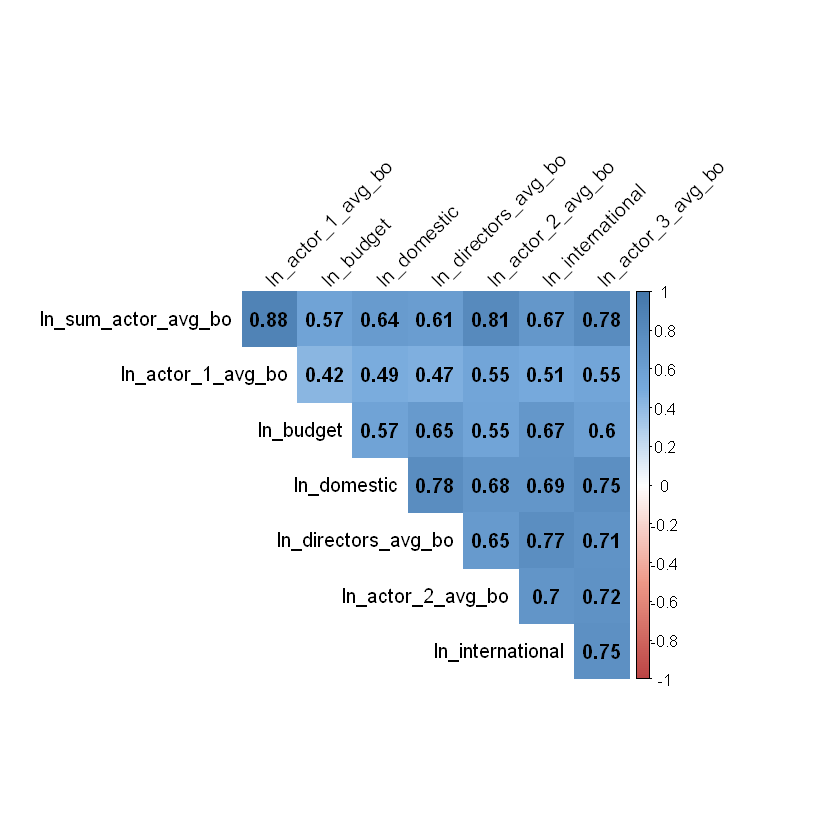

In [97]:
# check for corerations in the numberic columns of data3
cor<-cor(data3[,c("ln_budget","ln_international","ln_domestic",
                  "ln_directors_avg_bo","ln_sum_actor_avg_bo","ln_actor_1_avg_bo","ln_actor_2_avg_bo","ln_actor_3_avg_bo")])

#create 
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(cor, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         sig.level = 0.01, insig = "blank",
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

#looks like the variables are all some what correlated to each other

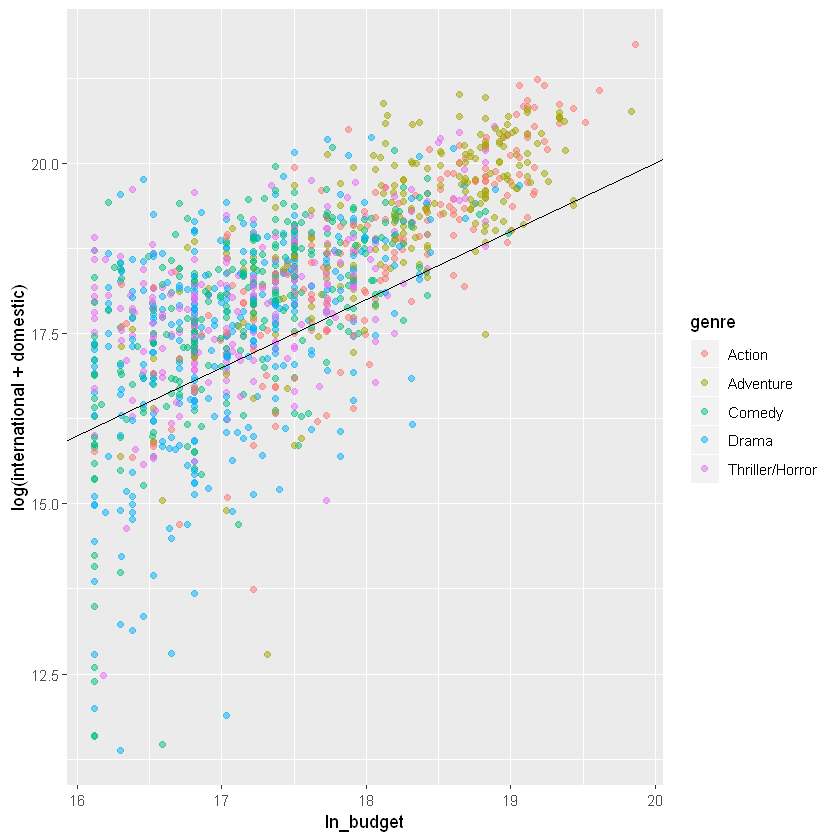

In [98]:
#scatter plot of genre categories on log_box office and log_budget
ggplot(data3,aes(x=ln_budget,y=log(international+domestic),color=genre))+geom_point(alpha=0.5,position="jitter")+geom_abline(slope=1,intercept=0)


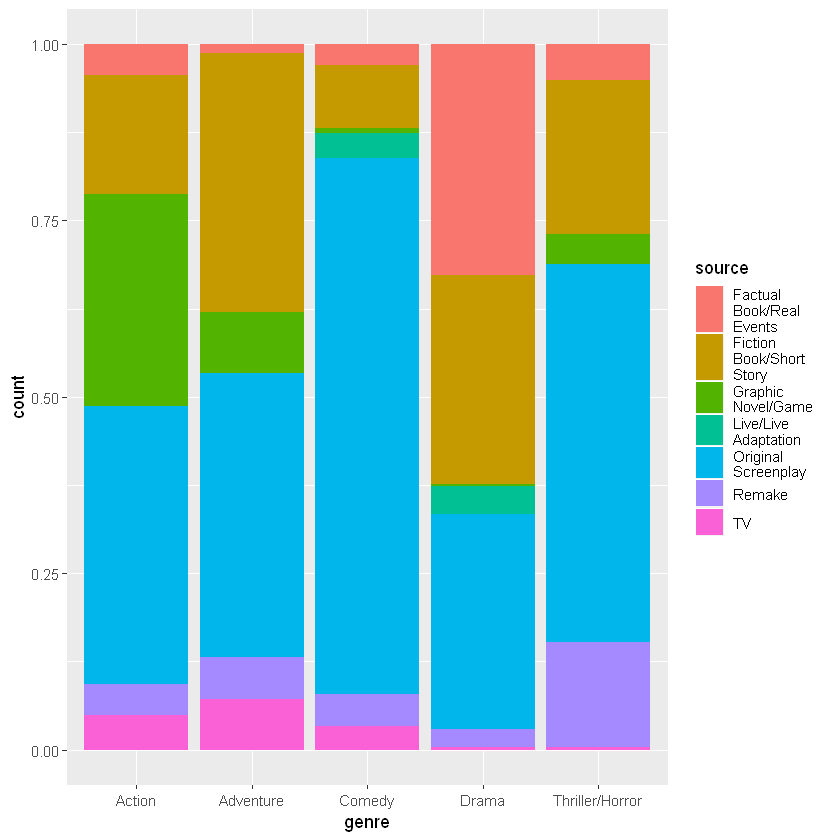

In [99]:
#horizontal bar chart with source quanity ratio per genre categories 
ggplot(data3,aes(x=genre,fill=source))+geom_bar(position="fill")

### Regresion Analysis

In [110]:
# Multivariate linear regression where the dependent varaibles are log international and log domestic box office

#convert these variables to factor as it was altered in earlier graphing steps
data3$storytype<-as.factor(data3$storytype)
data3$source<-as.factor(data3$source)
data3$production_method<-as.factor(data3$production_method)

m1<-
lm(cbind(ln_international,ln_domestic)~ln_budget+rating+storytype+source+production_method+genre+sequel+
   ln_directors_avg_bo+ln_sum_actor_avg_bo,data=data3)
summary(m1)

Response ln_international :

Call:
lm(formula = ln_international ~ ln_budget + rating + storytype + 
    source + production_method + genre + sequel + ln_directors_avg_bo + 
    ln_sum_actor_avg_bo, data = data3)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7210 -0.3969  0.1740  0.6173  3.4251 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -14.67570    1.03173 -14.224  < 2e-16
ln_budget                                 0.47887    0.05870   8.158 8.35e-16
ratingPG-13                               0.38921    0.11740   3.315 0.000943
ratingR                                   0.42574    0.12214   3.486 0.000508
storytypeDramatization                   -0.20131    0.19952  -1.009 0.313182
storytypeFantasy                          0.20184    0.11153   1.810 0.070574
storytypeHistorical\nFiction             -0.19349    0.11993  -1.613 0.106927
storytypeKids\nFiction                    0.25900    0

In [112]:
#Run anova on m1 to review model fit

anova(m1)

#doesn't look very good except for log director's average box office and log sum of actor's average box office

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
(Intercept),1,0.998121998,3.263291e+05,2,1228,0.000000e+00
ln_budget,1,0.694180564,1.393721e+03,2,1228,1.190039e-316
rating,2,0.049331404,1.554039e+01,4,2458,1.463484e-12
storytype,6,0.073430885,7.807191e+00,12,2458,1.906850e-14
source,6,0.043427210,4.546389e+00,12,2458,2.655623e-07
production_method,2,0.005688379,1.752740e+00,4,2458,1.356862e-01
genre,4,0.059267140,9.382965e+00,8,2458,7.711681e-13
sequel,1,0.038087895,2.431196e+01,2,1228,4.417021e-11
ln_directors_avg_bo,1,0.554278713,7.635425e+02,2,1228,3.348982e-216
ln_sum_actor_avg_bo,1,0.173093059,1.285261e+02,2,1228,2.081495e-51


In [113]:
# regression 2 removing a few independent variables
m2<-
lm(cbind(ln_international,ln_domestic)~ln_budget+rating+source+genre+
   ln_directors_avg_bo+ln_sum_actor_avg_bo,data=data3) # take out storytype, sequel, production method, title_flag


In [103]:
anova(m2)

# Looks like a better fit now

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
(Intercept),1,0.99809377,3.238443e+05,2,1237,0.000000e+00
ln_budget,1,0.69083893,1.382075e+03,2,1237,4.778571e-316
rating,2,0.04890388,1.551513e+01,4,2476,1.531089e-12
source,6,0.04391360,4.632126e+00,12,2476,1.750033e-07
genre,4,0.08305599,1.340980e+01,8,2476,3.775373e-19
ln_directors_avg_bo,1,0.56270029,7.958618e+02,2,1237,6.636375e-223
ln_sum_actor_avg_bo,1,0.17702191,1.330388e+02,2,1237,4.652062e-53
Residuals,1238,NA,NA,NA,NA,NA


In [114]:
#anova of m1 and m2 linear regressions to show which on has a better prediction
anova(m1,m2)

anova(m2, test = c("Wilks"))
anova(m2, test = c("Pillai"))
anova(m2, test = c("Hotelling-Lawley"))
anova(m2, test = c("Roy"))


Res.Df,Df,Gen.var.,Pillai,approx F,num Df,den Df,Pr(>F)
1229,NA,1.029058,NA,NA,NA,NA,NA
1238,9,1.033573,0.02319578,1.60234,18,2458,0.05129708


,Df,Wilks,approx F,num Df,den Df,Pr(>F)
(Intercept),1,0.001906228,3.238443e+05,2,1237,0.000000e+00
ln_budget,1,0.309161068,1.382075e+03,2,1237,4.778571e-316
rating,2,0.951198944,1.566756e+01,4,2474,1.148117e-12
source,6,0.956503894,4.635504e+00,12,2474,1.721852e-07
genre,4,0.918653733,1.340157e+01,8,2474,3.892656e-19
ln_directors_avg_bo,1,0.437299714,7.958618e+02,2,1237,6.636375e-223
ln_sum_actor_avg_bo,1,0.822978085,1.330388e+02,2,1237,4.652062e-53
Residuals,1238,NA,NA,NA,NA,NA


,Df,Pillai,approx F,num Df,den Df,Pr(>F)
(Intercept),1,0.99809377,3.238443e+05,2,1237,0.000000e+00
ln_budget,1,0.69083893,1.382075e+03,2,1237,4.778571e-316
rating,2,0.04890388,1.551513e+01,4,2476,1.531089e-12
source,6,0.04391360,4.632126e+00,12,2476,1.750033e-07
genre,4,0.08305599,1.340980e+01,8,2476,3.775373e-19
ln_directors_avg_bo,1,0.56270029,7.958618e+02,2,1237,6.636375e-223
ln_sum_actor_avg_bo,1,0.17702191,1.330388e+02,2,1237,4.652062e-53
Residuals,1238,NA,NA,NA,NA,NA


,Df,Hotelling-Lawley,approx F,num Df,den Df,Pr(>F)
(Intercept),1,523.59634046,323844.33657,2,1237,0.000000e+00
ln_budget,1,2.23455992,1382.07531,2,1237,4.778571e-316
rating,2,0.05119668,15.81977,4,2472,8.612978e-13
source,6,0.04503757,4.63887,12,2472,1.694215e-07
genre,4,0.08668831,13.39334,8,2472,4.013639e-19
ln_directors_avg_bo,1,1.28676116,795.86178,2,1237,6.636375e-223
ln_sum_actor_avg_bo,1,0.21509918,133.03885,2,1237,4.652062e-53
Residuals,1238,NA,NA,NA,NA,NA


,Df,Roy,approx F,num Df,den Df,Pr(>F)
(Intercept),1,523.59634046,3.238443e+05,2,1237,0.000000e+00
ln_budget,1,2.23455992,1.382075e+03,2,1237,4.778571e-316
rating,2,0.04899001,3.032482e+01,2,1238,1.388457e-13
source,6,0.03092221,6.380283e+00,6,1238,1.250081e-06
genre,4,0.04753866,1.471321e+01,4,1238,9.516828e-12
ln_directors_avg_bo,1,1.28676116,7.958618e+02,2,1237,6.636375e-223
ln_sum_actor_avg_bo,1,0.21509918,1.330388e+02,2,1237,4.652062e-53
Residuals,1238,NA,NA,NA,NA,NA


In [115]:
# detailed look at the coefficients of each independent variable's effect on international and domestic box office
m2$coefficients

,ln_international,ln_domestic
(Intercept),-15.4397850,-6.29037085
ln_budget,0.4917260,0.09519264
ratingPG-13,0.2572970,-0.02986044
ratingR,0.2869298,-0.37194640
sourceFiction Book/Short Story,0.4279208,-0.01770711
sourceGraphic Novel/Game,0.1885058,0.13650414
sourceLive/Live Adaptation,-0.1938292,-0.14990683
sourceOriginal Screenplay,0.2952634,0.01882078
sourceRemake,0.3063950,0.32997568
sourceTV,0.2104163,0.16591676


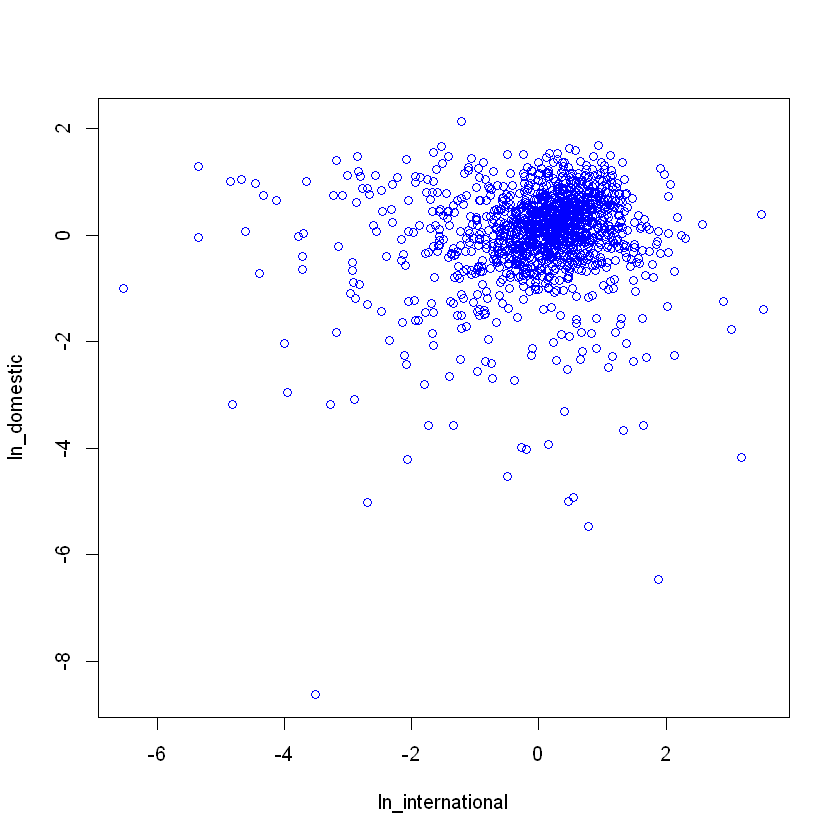

In [116]:
# plot residuals to check if the residuals are distributed normally around 0
plot(resid(m2) , col = 500)

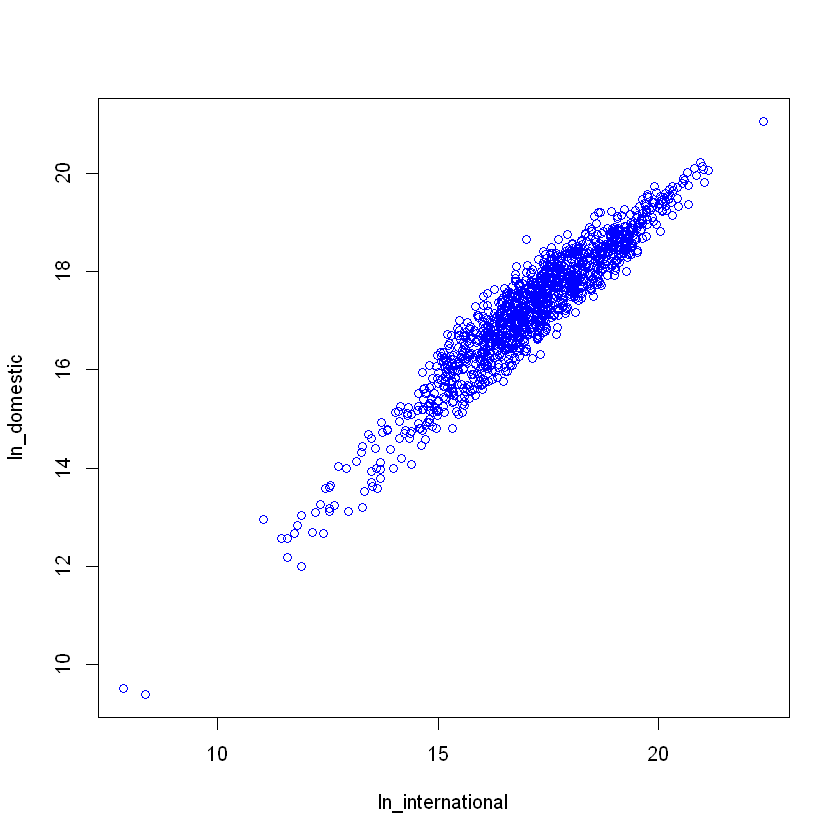

In [117]:
# plot the fitted values
plot(fitted(m2), col = 36)

### Test and Train m2

In [118]:
# Test & Train dataset and model stability testing 80/20
set.seed(123)
smp_size<-floor(0.8*nrow(data3))
train_ind<-sample(seq_len(nrow(data3)),size=smp_size)

train<-data3[train_ind,]
test<-data3[-train_ind,]

glimpse(data3)

#review the dimensions of test and train data
dim(train)
dim(test)

Observations: 1,254
Variables: 26
$ id_number           <dbl> 264790100, 200450100, 230490100, 207170100, 202...
$ `Title flag`        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ movie_name          <chr> "Flatliners", "Alice Through the Looking Glass"...
$ year                <dbl> 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016,...
$ budget              <dbl> 2.00e+07, 1.70e+08, 2.00e+07, 9.50e+07, 2.50e+0...
$ domestic            <dbl> 16877430, 77042381, 113257297, 26410477, 408084...
$ international       <dbl> 28192226, 200400000, 68200000, 62314623, 745220...
$ rating              <fct> PG-13, PG, R, PG-13, PG-13, PG-13, R, PG-13, PG...
$ storytype           <fct> Science
Fiction, Fantasy, Contemporary
Fiction,...
$ source              <fct> Original
Screenplay, Fiction
Book/Short
Story, ...
$ production_method   <fct> Live
Action, Animation/Live
Action, Live
Action...
$ genre               <fct> Thriller/Horror, Adventure, Comedy, Drama, Acti...
$ sequel          

[1] 1003   26

[1] 251  26

In [119]:
m2_train<-
lm(cbind(ln_international,ln_domestic)~ln_budget+rating+source+genre+
   ln_directors_avg_bo+ln_sum_actor_avg_bo,data=train)

anova(m2_train)


,Df,Pillai,approx F,num Df,den Df,Pr(>F)
(Intercept),1,0.99822359,2.770333e+05,2,986,0.000000e+00
ln_budget,1,0.71540718,1.239300e+03,2,986,8.558551e-270
rating,2,0.06220766,1.584250e+01,4,1974,9.050791e-13
source,6,0.04585491,3.860068e+00,12,1974,7.215039e-06
genre,4,0.08262772,1.063351e+01,8,1974,1.003044e-14
ln_directors_avg_bo,1,0.59376498,7.205832e+02,2,986,1.340413e-193
ln_sum_actor_avg_bo,1,0.16942495,1.005647e+02,2,986,1.793859e-40
Residuals,987,NA,NA,NA,NA,NA


In [120]:
# check the factors and levels for the categorical 
levels(train$rating)
"***********"
levels(train$source)
"***********"
levels(train$genre)

[1] "PG"    "PG-13" "R"

[1] "***********"

[1] "Factual\nBook/Real\nEvents" "Fiction\nBook/Short\nStory"
[3] "Graphic\nNovel/Game"        "Live/Live\nAdaptation"     
[5] "Original\nScreenplay"       "Remake"                    
[7] "TV"

[1] "***********"

[1] "Action"          "Adventure"       "Comedy"          "Drama"          
[5] "Thriller/Horror"

### Prediction and Model Fit

In [121]:
# insert test predicitons
predict_m2<-predict(m2_train,test)
head(predict_m2)
head(test)


summary(m2_train)

ln_international,ln_domestic
16.69528,16.85926
18.46693,18.16337
19.78405,19.21519
19.46288,19.07540
16.95525,16.56919
17.48369,17.74396


id_number,Title flag,movie_name,year,budget,domestic,international,rating,storytype,source,...,actor_3_avg_bo,ln_budget,sqrt_budget,ln_international,ln_domestic,ln_directors_avg_bo,ln_actor_1_avg_bo,ln_actor_2_avg_bo,ln_actor_3_avg_bo,ln_sum_actor_avg_bo
264790100,0,Flatliners,2017,2.0e+07,16877430,28192226,PG-13,Science Fiction,Original Screenplay,...,15036069,16.81124,4472.136,17.15456,16.64149,17.93180,18.39248,18.41242,16.52596,19.16942
207170100,0,Ben-Hur,2016,9.5e+07,26410477,62314623,PG-13,Historical Fiction,Fiction Book/Short Story,...,105334948,18.36939,9746.794,17.94771,17.08927,19.06013,19.34121,19.07939,18.47266,20.12475
142380100,0,Deadpool,2016,5.8e+07,363070709,437958540,R,Super Hero,Graphic Novel/Game,...,801029249,17.87595,7615.773,19.89763,19.71011,20.50141,19.36370,19.89169,20.50141,21.12416
181360100,0,Kung Fu Panda 3,2016,1.4e+08,143528619,375085764,PG,Kids Fiction,Original Screenplay,...,386894149,18.75715,11832.160,19.74267,18.78205,20.06667,19.09332,19.70781,19.77366,20.66677
227640100,0,Money Monster,2016,2.7e+07,41012075,52457624,R,Contemporary Fiction,Original Screenplay,...,121470366,17.11135,5196.152,17.77552,17.52938,17.71258,18.39248,18.67143,18.61518,19.66538
208990100,0,Neighbors 2: Sorority Rising,2016,3.5e+07,55340730,53417791,R,Contemporary Fiction,Original Screenplay,...,108758521,17.37086,5916.080,17.79365,17.82902,18.66434,18.67890,19.48756,18.50464,20.08622


Response ln_international :

Call:
lm(formula = ln_international ~ ln_budget + rating + source + 
    genre + ln_directors_avg_bo + ln_sum_actor_avg_bo, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4180 -0.3643  0.1559  0.6035  3.0452 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -14.423674   0.978765 -14.737  < 2e-16 ***
ln_budget                          0.510951   0.060259   8.479  < 2e-16 ***
ratingPG-13                        0.304525   0.111466   2.732 0.006408 ** 
ratingR                            0.305698   0.117908   2.593 0.009664 ** 
sourceFiction\nBook/Short\nStory   0.448581   0.128755   3.484 0.000516 ***
sourceGraphic\nNovel/Game          0.238509   0.178783   1.334 0.182487    
sourceLive/Live\nAdaptation       -0.230833   0.262882  -0.878 0.380111    
sourceOriginal\nScreenplay         0.293409   0.123399   2.378 0.017610 *  
sourceRemake                       0.288

In [128]:
#convert predisction resutls to a dataframe
predict_m2_df<-as.data.frame(predict_m2)

#calculate the r-square of International Box Office
SSE_international = sum((test$ln_international - predict_m2_df$ln_international)^2) # Explained variation
SST_international = sum((test$ln_international - mean(test$ln_international))^2) # Total Variation
Rsq_international=1 - SSE_international/SST_international

cat("The R-quare for international box office prediction is:", Rsq_international,"\n")

#calculate the r-square of Domestic Box Office
SSE_domestic = sum((test$ln_domestic - predict_m2_df$ln_domestic)^2) # Explained variation
SST_domestic = sum((test$ln_domestic - mean(test$ln_domestic))^2) # Total Variation
Rsq_domestic=1 - SSE_domestic/SST_domestic

cat("The R-quare for domestic box office prediction is:",Rsq_domestic)

coefficients<-m2_train$coefficient

The R-quare for international box office prediction is: 0.6222723 
The R-quare for domestic box office prediction is: 0.5955638